In [2]:
import read_arbor_reconstruction as rar
import pareto_functions as pf
import plotly
import matplotlib
import networkx as nx
import plotly.graph_objects as go
import utils as ut
import math
import pylab
import seaborn as sns
import pandas as pd
from constants import *
import pingouin as pg
from scipy.stats import mannwhitneyu

In [2]:
sns.__version__

'0.13.2'

In [3]:
G = rar.read_arbor_full('001_1_c_day5.csv')

In [689]:
G_opt = pf.opt_arbor(G, 0.34)

In [7]:
list(G.nodes(data = True))

[((6.316246, 4.788182), {'label': 'main root base'}),
 ((6.248517, 5.230901), {'label': 'main root'}),
 ((6.172466, 5.448168), {'label': 'main root'}),
 ((6.078373, 5.719055), {'label': 'main root'}),
 ((6.051647, 5.865528), {'label': 'main root'}),
 ((6.02648, 5.978601), {'label': 'main root'}),
 ((6.009377, 6.051857), {'label': 'main root'}),
 ((5.988092, 6.152656), {'label': 'main root'}),
 ((5.888783, 6.313534), {'label': 'main root'}),
 ((5.857484, 6.399435), {'label': 'main root'}),
 ((5.805855, 6.535716), {'label': 'main root'}),
 ((5.771865, 6.631406), {'label': 'main root'}),
 ((5.703528, 6.716372), {'label': 'main root'}),
 ((5.67063, 6.775653), {'label': 'main root'}),
 ((5.644983, 6.913284), {'label': 'main root'}),
 ((5.611528, 6.990774), {'label': 'main root'}),
 ((5.590928, 7.125623), {'label': 'main root'}),
 ((5.565074, 7.224829), {'label': 'main root'}),
 ((5.492228, 7.511988), {'label': 'main root'}),
 ((6.370103, 4.928189), {'label': 'lateral root'}),
 ((6.481349, 4

In [1]:
##nodes = list(G.nodes(data=True))
##nodes

In [2]:
#list(G_opt.nodes(data=True))

In [61]:
for key, value in dict.items():
    print(key, value)

x 1
y 2
(3, 4) (3, 4)


In [5]:
coords = {}
for coordinate in list(G.nodes):
    coords[coordinate] = coordinate
coords[(6.316246, 4.788182)]

KeyError: (6.316246, 4.788182)

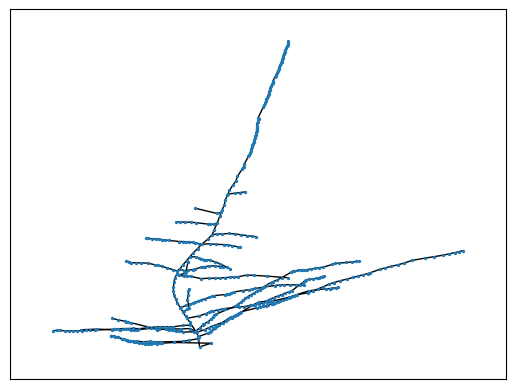

In [6]:
nx.draw_networkx(G, pos = coords, with_labels = False, node_size = 2)

In [691]:
opt_coords = {}
for coordinate in list(G_opt.nodes):
    opt_coords[coordinate] = coordinate

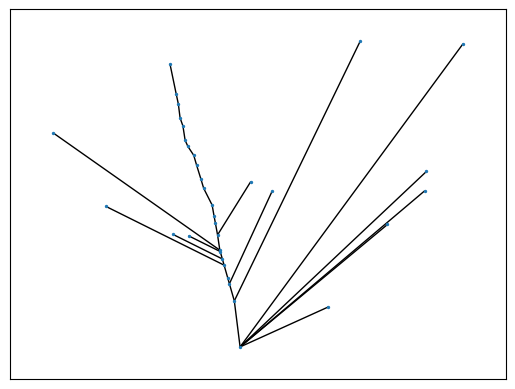

In [693]:
nx.draw_networkx(G_opt, pos = opt_coords, with_labels = False, node_size = 2)
## this is optimal graph for alpha = 0.34

In [23]:

def create_dict(G, G_opt) :
    G_dict = {}
    for coordinate in list(G.nodes):
        G_dict[coordinate] = coordinate
        
    G_opt_dict = {}
    for coordinate in list(G_opt.nodes):
        G_opt_dict[coordinate] = coordinate
        
    return G_dict, G_opt_dict

In [2]:
def line_equation(G, G_opt, main_root, lateral_tip) :

    G_dict, G_opt_dict = create_dict(G, G_opt)
    
    pt1 = G_opt_dict[main_root]
    pt2 = G_opt_dict[lateral_tip]

    x1, y1 = pt1
    x2, y2 = pt2
    m = (y2 - y1) / (x2 - x1)
    
    y_int = y1 - m * x1

    return m, y_int
    

In [465]:
line_equation((6.248517, 5.230901), ((8.934018, 7.703327)))

(0.9206572628347557, -0.5218415579964386)

In [604]:
line_equation((6.02440797570308, 5.987475946611424), ((6.441282, 6.378145)))[0]

0.9371393529435184

In [467]:
print(len(G.nodes))
print(list(G.nodes(data = True))[282][1]["label"])
node = list(G.nodes(data = True))[282]
print(node[1]["label"])
G.nodes[(8.934018, 7.703327)]
print(G.nodes[(8.934018, 7.703327)]["label"])

if G.nodes[(8.934018, 7.703327)]["label"] == ("lateral root tip"):
    print("hello")

283
lateral root tip
lateral root tip
lateral root tip
hello


In [16]:
def fill_lateral_root(G, G_opt, main_root, lateral_tip) :

    ## This method uses the lateral tip and main root to fill in points of the lateral root
    ## in order to perform distance calculation
    '''
    answer: loop backwards from lateral root tip until the main root point is reached
    using the line equation
    - then calculate distance from each added point's y-coordinate to observed point on lateral root
    (different method)

    '''
    m = line_equation(G, G_opt, main_root, lateral_tip)[0]
    y_int = line_equation(G, G_opt, main_root, lateral_tip)[1]

    ## lateral root tips are the same in optimal and observed

    ## dict to hold encountered tips

    observed = {}
    optimal = {}
    observed = create_dict(G, G_opt)[0]
    optimal = create_dict(G, G_opt)[1]
    backwards = {}

    ## reverses observed dictionary
    for node in reversed(observed):
        backwards[node] = observed[node]

    tip_found = False
    encountered_observed = []
    index = len(G.nodes) - 2
    ## loop backwards
    for node in backwards :
        if G.nodes[node]['label'] == "lateral root tip" and tip_found:
            break
        if lateral_tip == node:
            tip_found = True
           # print("tip was found")
            continue
        if tip_found == True and (list(G.nodes(data = True))[index][1]["label"] == "lateral root"): 
           # print("not a tip")
            encountered_observed.append(node)
        index -= 1

    ## need to calculate points based on observed x-coordinates and line equation
    x_coords = []
    y_coords = []
    count = -1
    for point in encountered_observed:
        for coords in point:
          count += 1
          if count % 2 == 0 :
              x_coords.append(coords)
          else :
              y_coords.append(coords)

    added_nodes = []
    for x in x_coords:
        added_nodes.append(m * x + y_int)

    '''
    print(m)
    print(y_int)
    print(x_coords)
    print(added_nodes)
    '''

    return added_nodes, y_coords

In [605]:
fill_lateral_root((6.02440797570308, 5.987475946611424),(6.441282, 6.378145))

tip was found
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip


([6.337263232867191,
  6.285757116890063,
  6.244722596042725,
  6.19606725797725,
  6.168127385308593,
  6.135737974992159,
  6.07278938751559,
  6.000365384041408],
 [6.33553,
  6.294864,
  6.263926,
  6.235345,
  6.218933,
  6.190983,
  6.136664,
  6.085598])

In [20]:
def calculate_distance(G, G_opt, lateral_tip):
    
    main_root = closest_main_root_point(G_opt, lateral_tip)
   # print(main_root)
    opt_y = fill_lateral_root(G, G_opt, main_root, lateral_tip)[0]
    actual_y = fill_lateral_root(G, G_opt, main_root, lateral_tip)[1]

    distances = []
    
    for x in range(len(opt_y)):
        diff = (opt_y[x] - actual_y[x]) ** 2
        distances.append(diff)

   # print(opt_y)
   # print(actual_y)
    return sum(distances)

In [576]:

calculate_distance((6.441282, 6.378145))

(6.02440797570308, 5.987475946611424)
tip was found
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
tip was found
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
not a tip
[6.337263232867191, 6.285757116890063, 6.244722596042725, 6.19606725797725, 6.168127385308593, 6.135737974992159, 6.07278938751559, 6.000365384041408]
[6.33553, 6.294864, 6.263926, 6.235345, 6.218933, 6.190983, 6.136664, 6.085598]


0.32447913009940166

In [527]:
for edge in container.edges():
   # print(container.nodes[edge[0]]['pos'])
    x, y = (container.nodes[edge[0]]['pos'])
    # print(x)

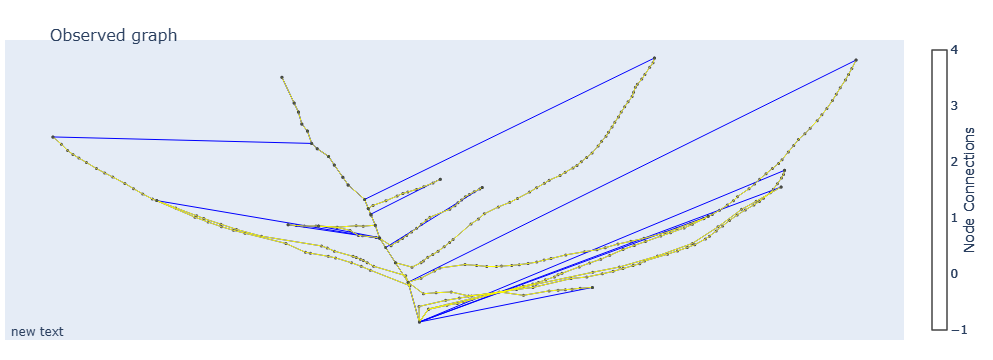

In [694]:
edge_x = []
edge_y = []
for edge in container.edges():
    x0, y0 = container.nodes[edge[0]]['pos']
    x1, y1 = container.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in container.nodes():
    x, y = container.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='x,y',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=['LightSkyBlue'],
        size=1,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


optedge_x = []
optedge_y = []
for edge in optcontainer.edges():
    x0, y0 = optcontainer.nodes[edge[0]]['pos']
    x1, y1 = optcontainer.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

optedge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#444'),
    hoverinfo='x,y',
    mode='lines')


optnode_x = []
optnode_y = []
for node in optcontainer.nodes():
    optx, opty = optcontainer.nodes[node]['pos']
    optnode_x.append(optx)
    optnode_y.append(opty)

optnode_trace = go.Scatter(
    x=optnode_x, y=optnode_y,
    mode='markers',
    hoverinfo='x,y',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Reds',
        reversescale=True,
        color=["red"],
        size=1,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

optedge_trace.line.color = "blue"
edge_trace.line.color = "yellow"
optnode_trace.marker.color = "green"
node_trace.marker.color = "red"

fig = go.Figure(data=[node_trace, optedge_trace, edge_trace, optnode_trace],
             layout=go.Layout(
                title='<br>Observed graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [17]:
def get_nodes_coords(G):
    pairs = []
    count = -1
    for node in G :
            pairs.append(node)

    x_coords = []
    y_coords = []
    for point in pairs:
        for coords in pairs:
          count += 1
          if count % 2 == 0 :
              x_coords.append(coords)
          else :
              y_coords.append(coords)
    return x_coords, y_coords

In [538]:
'''
optnode_x = []
optnode_y = []
for node in optcontainer.nodes():
    optx, opty = optcontainer.nodes[node]['pos']
    optnode_x.append(optx)
    optnode_y.append(opty)

optnode_trace = go.Scatter(
    x=optnode_x, y=optnode_y,
    mode='markers',
    hoverinfo='y',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Reds',
        reversescale=True,
        color=["red"],
        size=10,
        line_width=2))

optnode_trace.marker.color = "green"
fig = go.Figure(data=[optnode_trace],
             layout=go.Layout(
                title='<br>Optimal graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()
'''

'\noptnode_x = []\noptnode_y = []\nfor node in optcontainer.nodes():\n    optx, opty = optcontainer.nodes[node][\'pos\']\n    optnode_x.append(optx)\n    optnode_y.append(opty)\n\noptnode_trace = go.Scatter(\n    x=optnode_x, y=optnode_y,\n    mode=\'markers\',\n    hoverinfo=\'y\',\n    marker=dict(\n        showscale=True,\n        # colorscale options\n        #\'Greys\' | \'YlGnBu\' | \'Greens\' | \'YlOrRd\' | \'Bluered\' | \'RdBu\' |\n        #\'Reds\' | \'Blues\' | \'Picnic\' | \'Rainbow\' | \'Portland\' | \'Jet\' |\n        #\'Hot\' | \'Blackbody\' | \'Earth\' | \'Electric\' | \'Viridis\' |\n        colorscale=\'Reds\',\n        reversescale=True,\n        color=["red"],\n        size=10,\n        line_width=2))\n\noptnode_trace.marker.color = "green"\nfig = go.Figure(data=[optnode_trace],\n             layout=go.Layout(\n                title=\'<br>Optimal graph\',\n                titlefont_size=16,\n                showlegend=False,\n                hovermode=\'closest\',\n  

In [337]:
container = nx.Graph()

In [532]:
#for node in G:
    #container.add_node(node, pos = (node))
#for a in G.edges():
    #container.add_edge(u, v, pos = (u, v))
  # print(a)


In [354]:
#list(container.nodes(data=True))

In [358]:
del dict

In [365]:
optcontainer = nx.Graph()

In [542]:
for node in G_opt:
    optcontainer.add_node(node, pos = (node))
for u, v in G_opt.edges():
    optcontainer.add_edge(u, v, pos = (u, v))
print(G_opt)

Graph with 34 nodes and 33 edges


In [18]:
def closest_main_root_point(G, lateral_root_tip):
    '''
    Given an arbor and a lateral root tip, find the closest point on the main root
    '''
    curr = lateral_root_tip
    while not ut.is_on_main_root(G, curr):
        curr = list(G.neighbors(curr))[0]
    return curr

In [584]:
ut.is_on_main_root(G, (6.441282, 6.378145))

False

In [596]:
closest_main_root_point(G_opt, (6.441282, 6.378145))
print(list(G_opt.neighbors((6.441282, 6.378145))))

[(6.02440797570308, 5.987475946611424)]


In [592]:
G.neighbors((7.3533, 5.173133))

In [432]:
print(len(list(G.neighbors((7.279947, 5.163166)))))
print(list(G.neighbors((7.279947, 5.163166)))
curr = list(G.neighbors((7.279947, 5.163166)))[0]
print(curr)

2
[(7.231468, 5.154068), (7.3533, 5.173133)]
(7.231468, 5.154068)


In [13]:
def cumulative_distance(fname, alpha):
    G, G_opt = create_graphs(fname, alpha)
    results = []
    sum_of_distances = 0
    for node in G :
        if (G.nodes[node]['label'] == "lateral root tip"):
            sum_of_distances = calculate_distance(G, G_opt, node)
            results.append(sum_of_distances)
    return sum(results)

In [684]:
cumulative_distance('002_1_c_day4.csv', 0.1)

[23.29184977890624, 2.153877113512353, 8.41595607208615, 5.071457583609391, 11.695772542848072, 3.5422224775362494, 4.235651030037667, 9.746062146700673, 1.9274240239095874, 1.2611465456536122, 8.798328012777219, 0.528676088501661]


80.66842341607887

In [554]:
#take optimal graph
#add in calculated points on lateral root
#make pos of nodes equal to the node name
#add edges
''' not necessary
def add_lateral_nodes(fname, alpha):
    G = rar.read_arbor_full(fname)
    G_opt = pf.opt_arbor(G, alpha)
    added_nodes = []
    for node in G :
        if (G_opt.nodes[node]['label'] == "lateral root tip"):
            main_root = closest_main_root_point(G_opt, node)
            added_nodes = fill_lateral_root(main_root, lateral_tip)[0]
'''  

In [8]:
#loop through same file with different alphas, find smallest cumulative distance, return it

def find_best_distance(fname):
    results = []
    best_alpha = math.inf
    best_distance = math.inf
    delta = 0.01
    for alpha in range(1, 100):
        distance = cumulative_distance(fname, alpha / 100)
        if distance < best_distance:
            best_distance = distance
            best_alpha = alpha
        results.append(distance)
    return min(results), best_alpha / 100

In [25]:
find_best_distance('002_1_c_day4.csv')

(24.911788270821184, 0.34)

In [16]:
def create_graphs(fname, alpha):
    G = rar.read_arbor_full(fname)
    G_opt = pf.opt_arbor(G, alpha)
    return G, G_opt

In [667]:
G, G_opt = create_graphs('002_1_c_day4.csv', 0.5)
print(G, G_opt)

Graph with 283 nodes and 282 edges Graph with 34 nodes and 33 edges


In [14]:
pylab.arange(0, 1.01, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [15]:
def find_best(fname):
    results = []
    best_alpha = math.inf
    best_distance = math.inf
    min_alpha = 0
    delta = 0.01
    max_alpha = 1
    for alpha in pylab.arange(min_alpha, max_alpha + delta, delta):
        distance = cumulative_distance(fname, alpha)
        if distance < best_distance:
            best_distance = distance
            best_alpha = alpha
        results.append(distance)
    return min(results), best_alpha

In [24]:
find_best('002_1_c_day4.csv')

(24.911788270821184, 0.34)

In [3]:
point_similarity_df = pd.read_csv('%s/point_similarity.csv' % ARCHITECTURE_DIR, skipinitialspace=True)
point_similarity_df

,arbor name,distance squared,alpha
0,001_1_C_day2,0.039670,0.34
1,001_1_C_day3,0.605481,0.58
2,001_1_C_day4,4.109349,0.73
3,001_1_C_day5,31.950669,0.71
4,001_1_S_day2,0.007549,0.34
...,...,...,...
7167,m248_9_S_noacc_day5,0.000751,0.90
7168,m248_9_S_noacc_day9,15.792075,0.33
7169,M248_9_S_nocyto_day9,17.324673,0.22
7170,M248_9_S_noga_day5,0.004218,0.67


In [4]:
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiABA,M248_10_C_10aba_day5,5,1,M248,10,Control,10aba
1,PimpiABA,M248_9_C_10aba_day5,5,2,M248,9,Control,10aba
2,PimpiABA,M248_8_C_10aba_day5,5,3,M248,8,Control,10aba
3,PimpiABA,M248_7_C_10aba_day5,5,4,M248,7,Control,10aba
4,PimpiABA,M248_6_C_10aba_day5,5,5,M248,6,Control,10aba
...,...,...,...,...,...,...,...,...
9790,PimpiIAA1,1511_2_C_noiaa_day9,9,148,1511,2,Control,noiaa
9791,PimpiIAA1,1511_3_C_noiaa_day9,9,149,1511,3,Control,noiaa
9792,PimpiIAA1,1511_4_C_noiaa_day9,9,150,1511,4,Control,noiaa
9793,PimpiIAA1,1511_5_C_noiaa_day9,9,151,1511,5,Control,noiaa


In [5]:
metadata_df = metadata_df[metadata_df['hormone'].notna()]
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiABA,M248_10_C_10aba_day5,5,1,M248,10,Control,10aba
1,PimpiABA,M248_9_C_10aba_day5,5,2,M248,9,Control,10aba
2,PimpiABA,M248_8_C_10aba_day5,5,3,M248,8,Control,10aba
3,PimpiABA,M248_7_C_10aba_day5,5,4,M248,7,Control,10aba
4,PimpiABA,M248_6_C_10aba_day5,5,5,M248,6,Control,10aba
...,...,...,...,...,...,...,...,...
9790,PimpiIAA1,1511_2_C_noiaa_day9,9,148,1511,2,Control,noiaa
9791,PimpiIAA1,1511_3_C_noiaa_day9,9,149,1511,3,Control,noiaa
9792,PimpiIAA1,1511_4_C_noiaa_day9,9,150,1511,4,Control,noiaa
9793,PimpiIAA1,1511_5_C_noiaa_day9,9,151,1511,5,Control,noiaa


In [6]:
arbor_stats_df = pd.merge(point_similarity_df, metadata_df)
arbor_stats_df

,arbor name,distance squared,alpha,experiment,day,Picture #,genotype,replicate,condition,hormone
0,058_10_C_iaa_day9,4.414185,0.89,PimpiIAA1,9,77,058,10,Control,iaa
1,058_10_C_noiaa_day9,1.530970,0.78,PimpiIAA1,9,117,058,10,Control,noiaa
2,058_10_S_iaa_day9,9.072060,0.69,PimpiIAA1,9,67,058,10,Salt,iaa
3,058_10_S_noiaa_day9,0.041575,0.59,PimpiIAA1,9,107,058,10,Salt,noiaa
4,058_1_C_iaa_day9,3.915674,0.65,PimpiIAA1,9,68,058,1,Control,iaa
...,...,...,...,...,...,...,...,...,...,...
904,m248_9_S_noacc_day5,0.000751,0.90,PimpiACC,5,70,m248,9,Salt,noacc
905,m248_9_S_noacc_day9,15.792075,0.33,PimpiACC,9,70,m248,9,Salt,noacc
906,M248_9_S_nocyto_day9,17.324673,0.22,PimpiCyto,9,108,M248,9,Salt,nocyto
907,M248_9_S_noga_day5,0.004218,0.67,PimpiGA,5,19,M248,9,Salt,noga


<Axes: xlabel='hormone', ylabel='alpha'>

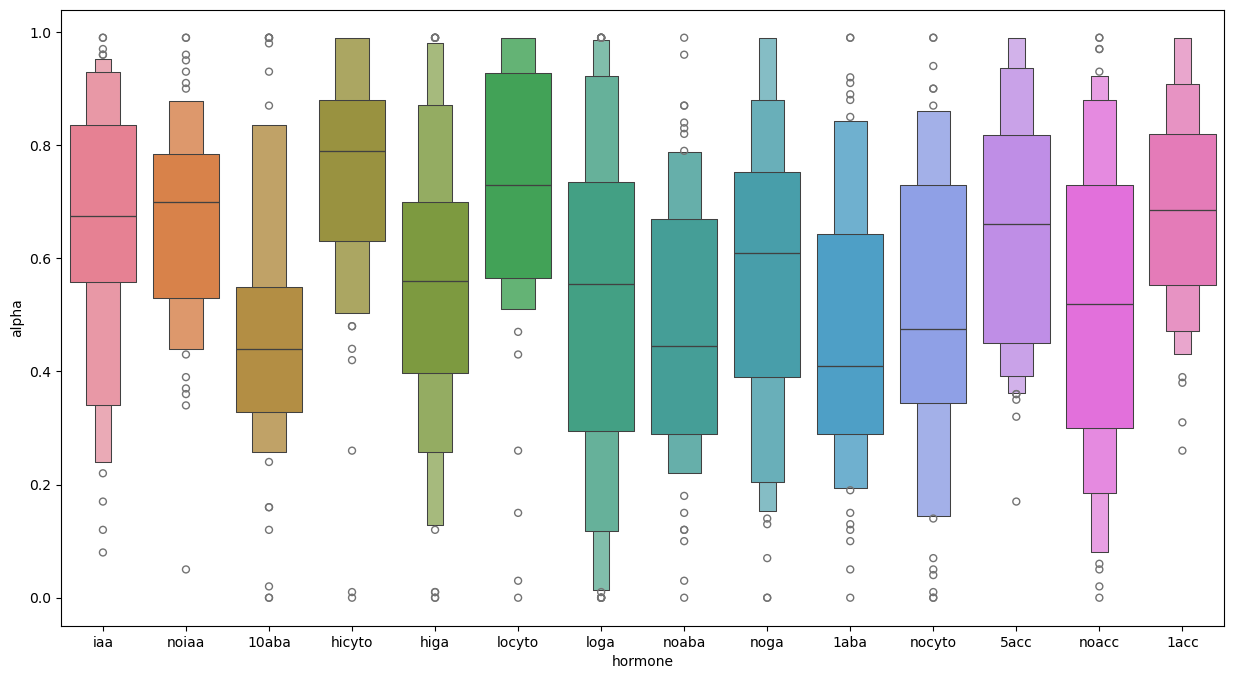

In [8]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y='alpha', hue="hormone", data = arbor_stats_df)

<Axes: xlabel='hormone', ylabel='alpha'>

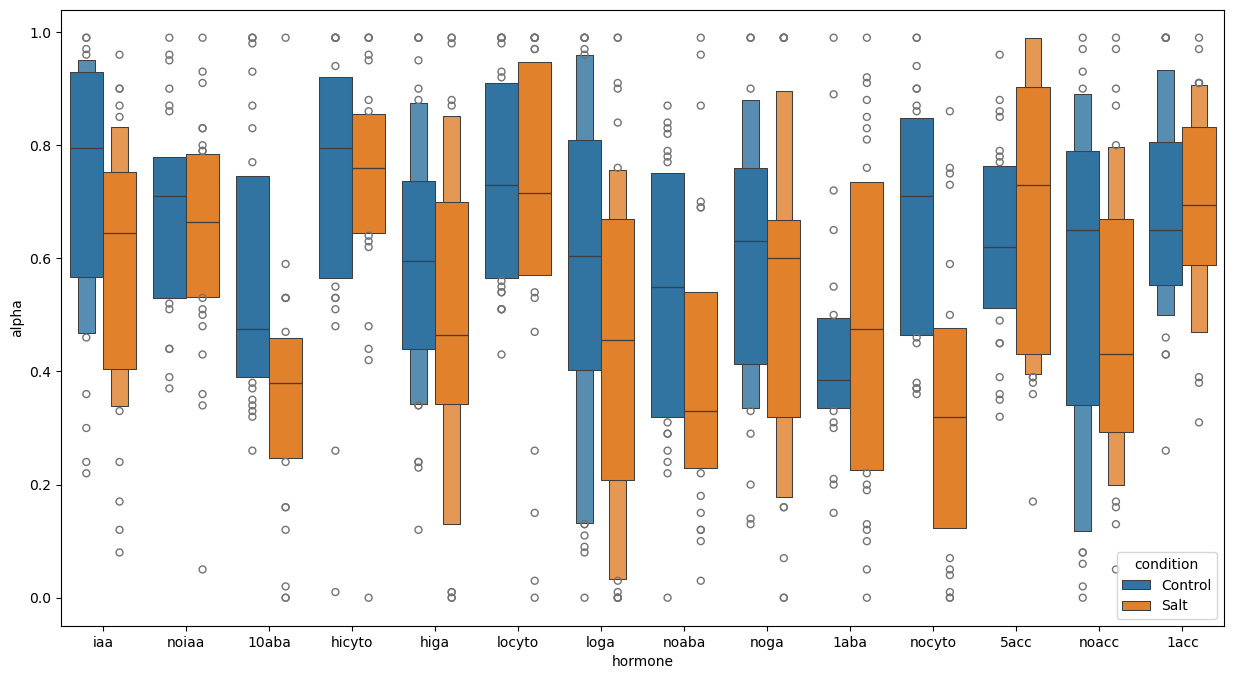

In [9]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y='alpha', hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])